## Importing Required Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import mahotas as mt
from matplotlib import pyplot as plt
%matplotlib inline
import shutil

# Loading Files path

In [2]:
ds_path = "/Users/revanthyenugudhati/Downloads/Final_Images_Cleaned/testingjpg/testingjjj"
img_files = os.listdir(ds_path)

# Testing on a single Image 

###### Season is taken as growing and based on the given values class labels are given

In [3]:
season='Growing'
img = plt.imread('/Users/revanthyenugudhati/Downloads/Final_Images_Cleaned/testingjpg/testingjjj/2021_0904_095406_002.JPG')

B1 = img[:,:,0].mean()
B2 = img[:,:,1].mean()
B3 = img[:,:,2].mean()
print("B1",B1)
print("B2",B2)
print("B3",B3)
NDVI = (B1-B2)/(B1+B2)
SR1 = (B1/B2)
SR2 = (B1/B3)
l = []
sums=0
res=0

print("NDVI",NDVI)
print("SR1",SR1)
print("SR2",SR2)

if 0.0 <= NDVI <=  0.35:
    l.append("shadows, other sides of leaves and branches ")
    sums+=0

if (0.36 <= NDVI <=  0.8 ) or (NDVI == 1)  :
    l.append("healthy soybean")
    sums+=1



if 0.0 <= SR1<= 3.125:
    l.append("vegetation ")
    sums+=1

if 3.126 <= SR1<=  4.8 :
    l.append("healthy vegetations")
    sums+=2

if 4.9 <= SR1<= 50 :
    l.append("branches, shadows, spaces between tree")
    sums+=0



if 0.0 <= SR2  <= 3.2 :
    l.append("shadow, branches, spaces between trees")
    sums+=0

if 3.21 <= SR2  <= 12 :
    l.append("healthy vegetation")
    sums+=1
if 3<= sums<=4:
    res=2
elif sums== 2:
    res=1
else:
    res=0
print(res)
print(sums)
d = {"output" :l}
print(d)

B1 14.156397083333333
B2 6.034953333333333
B3 4.594113916666666
NDVI 0.40222390193853846
SR1 2.345734308356983
SR2 3.0814205612047028
1
2
{'output': ['healthy soybean', 'vegetation ', 'shadow, branches, spaces between trees']}


##  Trail on all images in a folder

In [4]:
for file in img_files:
    imgpath = ds_path + "/" + file
    print(imgpath)
    main_img = cv2.imread(imgpath)
    B3 = main_img[:,:,0].mean()
    B2 = main_img[:,:,1].mean()
    B1 = main_img[:,:,2].mean()
    print("B1",B1)
    print("B2",B2)
    print("B3",B3)
    NDVI = (B2-B1)/(B1+B2)
    SR1 = (B1/B2)
    SR2 = (B1/B3)
    l = []
    sums=0
    res=0

    print("NDVI",NDVI)
    print("SR1",SR1)
    print("SR2",SR2)

    if 0.0 <= NDVI <=  0.35:
        l.append("shadows, other sides of leaves and branches ")
        sums+=0

    if (0.36 <= NDVI <=  0.8 ) or (NDVI == 1)  :
        l.append("healthy soybean")
        sums+=1



    if 0.0 <= SR1<= 3.125:
        l.append("vegetation ")
        sums+=1

    if 3.126 <= SR1<=  4.8 :
        l.append("healthy vegetations")
        sums+=2

    if 4.9 <= SR1<= 50 :
        l.append("branches, shadows, spaces between tree")
        sums+=0



    if 0.0 <= SR2  <= 3.2 :
        l.append("shadow, branches, spaces between trees")
        sums+=0

    if 3.21 <= SR2  <= 12 :
        l.append("healthy vegetation")
        sums+=1
    if 3<= sums<=4:
        res=2
        shutil.copy(imgpath, '/Users/revanthyenugudhati/Downloads/Final_Images_Cleaned/testingjpg/healthy')
    elif sums== 2:
        res=1
        shutil.copy(imgpath, '/Users/revanthyenugudhati/Downloads/Final_Images_Cleaned/testingjpg/unhealthy')
    else:
        res=0
    print(res)
    print(sums)
    d = {"output" :l}
    print(d)

/Users/revanthyenugudhati/Downloads/Final_Images_Cleaned/testingjpg/testingjjj/2021_0903_105946_008.JPG
B1 57.77939191666667
B2 20.130755083333334
B3 10.741987
NDVI -0.4832314952933324
SR1 2.87020490177755
SR2 5.378836514759017
1
2
{'output': ['vegetation ', 'healthy vegetation']}
/Users/revanthyenugudhati/Downloads/Final_Images_Cleaned/testingjpg/testingjjj/2021_0903_193025_042.JPG
B1 13.245333166666667
B2 5.322081166666667
B3 4.4735129166666665
NDVI -0.42672888414924337
SR1 2.4887506882880746
SR2 2.960834899418624
0
1
{'output': ['vegetation ', 'shadow, branches, spaces between trees']}
/Users/revanthyenugudhati/Downloads/Final_Images_Cleaned/testingjpg/testingjjj/2021_0903_095942_004.JPG
B1 42.724056833333336
B2 13.993238666666667
B3 7.49435775
NDVI -0.5065618505499203
SR1 3.053192892014801
SR2 5.700829645253235
1
2
{'output': ['vegetation ', 'healthy vegetation']}
/Users/revanthyenugudhati/Downloads/Final_Images_Cleaned/testingjpg/testingjjj/2021_0912_093131_072.JPG
B1 27.9076155
B

## Creating a Dataset

In [5]:
def create_dataset():
    names = ['mean_nir','mean_r','mean_g','stddev_nir','stddev_r','stddev_g','health', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)
    for file in img_files:
        imgpath = ds_path + "/" + file
        print(imgpath)
        main_img = cv2.imread(imgpath)
        B3 = main_img[:,:,0].mean()
        B2 = main_img[:,:,1].mean()
        B1 = main_img[:,:,2].mean()
        print("B1",B1)
        print("B2",B2)
        print("B3",B3)
        NDVI = (B1-B2)/(B1+B2)
        SR1 = (B1/B2)
        SR2 = (B1/B3)
        l = []
        sums=0
        health=0
        print("NDVI",NDVI)
        print("SR1",SR1)
        print("SR2",SR2)

        if 0.0 <= NDVI <=  0.35:
            l.append("shadows, other sides of leaves and branches ")
            sums+=0

        if (0.36 <= NDVI <=  0.8 ) or (NDVI == 1)  :
            l.append("healthy soybean")
            sums+=1
        if 0.0 <= SR1<= 3.125:
            l.append("vegetation ")
            sums+=1

        if 3.126 <= SR1<=  4.8 :
            l.append("healthy vegetations")
            sums+=2

        if 4.9 <= SR1<= 50 :
            l.append("branches, shadows, spaces between tree")
            sums+=0
        if 0.0 <= SR2  <= 3.2 :
            l.append("shadow, branches, spaces between trees")
            sums+=0

        if 3.21 <= SR2  <= 12 :
            l.append("healthy vegetation")
            sums+=1
        if 3<= sums<=4:
            health=2
        elif sums== 2:
            health=1
        else:
            health=0
        #print(res)
        #print(sums)
        #d = {"output" :l}
        #print(d)


        #Preprocessing
        img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(img, (1600, 1200))
        gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        blur = cv2.GaussianBlur(gs, (25,25),0)
        ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        kernel = np.ones((50,50),np.uint8)
        closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
        
        #Color features
        red_channel = img[:,:,0]
        green_channel = img[:,:,1]
        blue_channel = img[:,:,2]
        blue_channel[blue_channel == 255] = 0
        green_channel[green_channel == 255] = 0
        red_channel[red_channel == 255] = 0
        
        red_mean = np.mean(red_channel)
        green_mean = np.mean(green_channel)
        blue_mean = np.mean(blue_channel)
        
        red_std = np.std(red_channel)
        green_std = np.std(green_channel)
        blue_std = np.std(blue_channel)
        
        #Texture features
        textures = mt.features.haralick(gs)
        ht_mean = textures.mean(axis=0)
        contrast = ht_mean[1]
        correlation = ht_mean[2]
        inverse_diff_moments = ht_mean[4]
        entropy = ht_mean[8]
        
        vector = [red_mean,green_mean,blue_mean,red_std,green_std,blue_std,health,\
                  contrast,correlation,inverse_diff_moments,entropy
                 ]
        
        df_temp = pd.DataFrame([vector],columns=names)
        df = df.append(df_temp)
        print(file)
        print(health)
    return df

In [6]:
dataset = create_dataset()

/Users/revanthyenugudhati/Downloads/Final_Images_Cleaned/testingjpg/testingjjj/2021_0903_105946_008.JPG
B1 57.77939191666667
B2 20.130755083333334
B3 10.741987
NDVI 0.4832314952933324
SR1 2.87020490177755
SR2 5.378836514759017
2021_0903_105946_008.JPG
2
/Users/revanthyenugudhati/Downloads/Final_Images_Cleaned/testingjpg/testingjjj/2021_0903_193025_042.JPG
B1 13.245333166666667
B2 5.322081166666667
B3 4.4735129166666665
NDVI 0.42672888414924337
SR1 2.4887506882880746
SR2 2.960834899418624
2021_0903_193025_042.JPG
1
/Users/revanthyenugudhati/Downloads/Final_Images_Cleaned/testingjpg/testingjjj/2021_0903_095942_004.JPG
B1 42.724056833333336
B2 13.993238666666667
B3 7.49435775
NDVI 0.5065618505499203
SR1 3.053192892014801
SR2 5.700829645253235
2021_0903_095942_004.JPG
2
/Users/revanthyenugudhati/Downloads/Final_Images_Cleaned/testingjpg/testingjjj/2021_0912_093131_072.JPG
B1 27.9076155
B2 10.757478333333333
B3 3.1019800833333333
NDVI 0.4435560725804179
SR1 2.594252540906814
SR2 8.996710085

In [7]:
dataset.shape

(71, 11)

In [8]:
type(dataset)

pandas.core.frame.DataFrame

In [9]:
dataset.to_csv("Soya_features.csv")

In [10]:
import numpy as np
import pandas as pd
import os
import string

In [11]:
dataset = pd.read_csv("Soya_features.csv")

In [12]:
dataset.head(5)

,Unnamed: 0,mean_nir,mean_r,mean_g,stddev_nir,stddev_r,stddev_g,health,contrast,correlation,inverse_difference_moments,entropy
0,0,57.779392,20.130755,10.741987,11.065606,8.301938,3.995644,2,4.610476,0.961374,0.508426,7.917949
1,0,13.245333,5.322081,4.473513,2.263542,1.234310,1.139061,1,1.201563,0.638991,0.661109,4.394053
2,0,42.724057,13.993239,7.494358,7.969823,5.520909,2.717361,2,2.340080,0.958370,0.598652,6.909054
3,0,27.907615,10.757478,3.101980,7.872432,3.729038,1.676034,2,1.213357,0.964916,0.677369,6.165658
4,0,111.498643,41.924335,29.961915,19.812590,17.380327,9.978472,2,27.067248,0.944179,0.351542,9.907498


In [13]:
type(dataset)

pandas.core.frame.DataFrame

In [14]:
X = dataset.iloc[:,1:]

In [15]:
X.head(5)

,mean_nir,mean_r,mean_g,stddev_nir,stddev_r,stddev_g,health,contrast,correlation,inverse_difference_moments,entropy
0,57.779392,20.130755,10.741987,11.065606,8.301938,3.995644,2,4.610476,0.961374,0.508426,7.917949
1,13.245333,5.322081,4.473513,2.263542,1.234310,1.139061,1,1.201563,0.638991,0.661109,4.394053
2,42.724057,13.993239,7.494358,7.969823,5.520909,2.717361,2,2.340080,0.958370,0.598652,6.909054
3,27.907615,10.757478,3.101980,7.872432,3.729038,1.676034,2,1.213357,0.964916,0.677369,6.165658
4,111.498643,41.924335,29.961915,19.812590,17.380327,9.978472,2,27.067248,0.944179,0.351542,9.907498


In [16]:
X.shape

(71, 11)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = X['health']
y

0     2
1     1
2     2
3     2
4     2
     ..
66    1
67    2
68    2
69    2
70    2
Name: health, Length: 71, dtype: int64

### Splitting the dataset for Training and Testing

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 142)

In [20]:
y_train[0:5]

3     2
32    2
7     1
62    1
65    2
Name: health, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [23]:
X_train[0:2]

array([[-0.91796583, -0.83089752, -1.19969209, -0.70843181, -0.81923069,
        -0.98364259,  0.43437224, -0.7601958 ,  0.57722961,  1.1909345 ,
        -0.72633877],
       [ 0.93311305,  0.56731981,  1.53354478,  0.23660988,  0.08595265,
         0.63230071,  0.43437224, -0.27740938,  0.51839174, -0.75959457,
         0.5883162 ]])

In [24]:
y_train[0:2]

3     2
32    2
Name: health, dtype: int64

### Using Support Vector Machine model

In [25]:
from sklearn import svm

In [26]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [27]:
y_pred = clf.predict(X_test)

In [28]:
from sklearn import metrics

In [56]:
print("Using Support Vector Machine")
metrics.accuracy_score(y_test, y_pred)
if metrics.accuracy_score(y_test, y_pred)==1:
        print("Plants Health accuracy is (%)",metrics.accuracy_score(y_test, y_pred) *100)


Using Support Vector Machine
Plants Health accuracy is (%) 100.0


In [38]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         6

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



## Using Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [41]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test[0].reshape(1,-1))

array([2])

In [43]:
logisticRegr.predict(X_test[0:10])

array([2, 2, 2, 1, 2, 1, 2, 2])

In [44]:
predictions = logisticRegr.predict(X_test)

In [45]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print("Accuracy Score using Logistic Regression",score)

Accuracy Score using Logistic Regression 1.0


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [47]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[2 0]
 [0 6]]


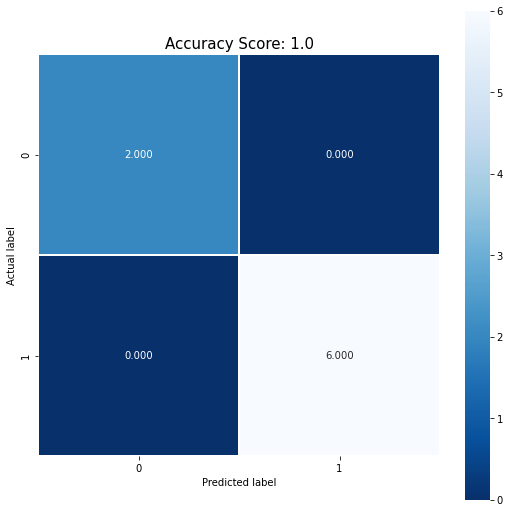

In [48]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

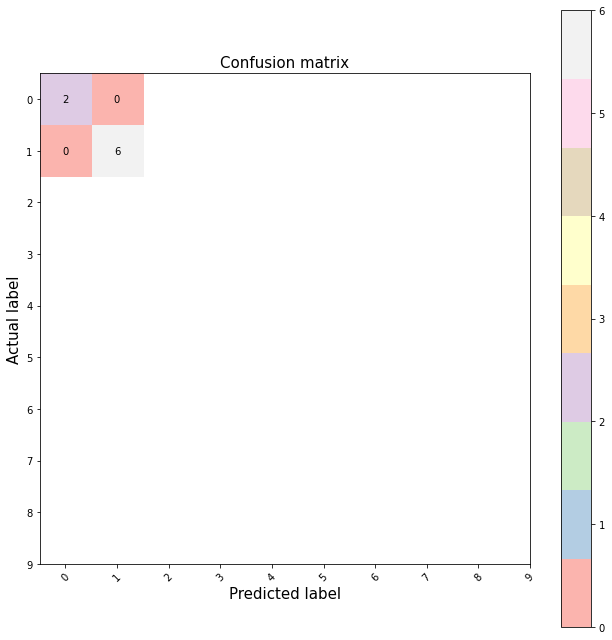

In [49]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

## Using KNN classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=10)

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [53]:
y_pred = knn.predict(X_test)
print(X_test)

[[-1.17891406 -1.1124111  -0.83885284 -0.06646835 -0.70337082 -0.70040303
   0.43437224 -0.72498964  0.76136421  1.32002086 -0.88043   ]
 [ 0.89969277  1.17060621 -0.14810315  0.83445536  0.77474114  0.5540994
   0.43437224  0.57816121  0.41331301 -1.12693064  1.0011181 ]
 [-0.81192457 -0.77893559 -0.90916842 -0.7195236  -0.73629826 -0.88091515
   0.43437224 -0.74981523  0.58532999  1.06273894 -0.63125349]
 [-1.38624892 -1.24450455 -0.86691401 -1.30380488 -1.10099802 -1.09569191
  -2.30217289 -0.72311384 -5.22936021  0.40737254 -1.41351126]
 [-1.04128921 -1.00395253 -0.98820544 -1.00920994 -0.9649205  -1.02951558
   0.43437224 -0.77397188  0.19117196  1.36046652 -1.10100431]
 [-1.41454394 -1.24582179 -1.00906326 -1.30785197 -1.0862265  -1.13403756
  -2.30217289 -0.75096349 -3.20922612  0.89551214 -1.48637333]
 [ 0.84139922  0.80751043  1.0881229   0.72347772  0.8543624   1.04277968
   0.43437224  0.63794489  0.40267043 -0.96254064  0.9432582 ]
 [ 0.35731228  0.06149687  0.6231335  -0.1

In [54]:
print("Accuracy Using KNN classifier:",metrics.accuracy_score(y_test, y_pred))


Accuracy Using KNN classifier: 1.0
